<a href="https://colab.research.google.com/github/alexwonton/forex-data-fft/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [278]:
#%pip install yfinance

In [5]:
# For data manipulation
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# To fetch financial data
import yfinance as yf

# For visualisation
import matplotlib.pyplot as plt
%matplotlib inline

# Set the ticker as 'EURUSD=X'
forex_data_hour = yf.download('GC=F', period='1mo', interval='1H')

# Set the index to a datetime object
forex_data_hour.index = pd.to_datetime(forex_data_hour.index)

# Display the last five rows
forex_data_hour.tail()

df = pd.DataFrame(forex_data_hour)
prices = df['Close'].values

[*********************100%***********************]  1 of 1 completed


In [11]:
df[50:100]

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-09-18 20:00:00,2584.199951,2584.399902,2581.800049,2583.500000,2583.500000,2485
2024-09-18 21:00:00,2583.500000,2583.500000,2575.300049,2580.100098,2580.100098,6549
2024-09-18 22:00:00,2580.199951,2591.600098,2580.199951,2588.899902,2588.899902,6973
2024-09-18 23:00:00,2588.899902,2590.100098,2585.800049,2588.899902,2588.899902,5369
2024-09-19 00:00:00,2588.800049,2588.899902,2584.000000,2588.699951,2588.699951,4622
2024-09-19 01:00:00,2588.600098,2599.199951,2588.600098,2599.199951,2599.199951,8481
2024-09-19 02:00:00,2599.100098,2603.500000,2598.600098,2600.699951,2600.699951,8760
2024-09-19 03:00:00,2600.600098,2610.000000,2599.800049,2609.300049,2609.300049,10617
2024-09-19 04:00:00,2610.000000,2612.000000,2606.399902,2610.399902,2610.399902,6143


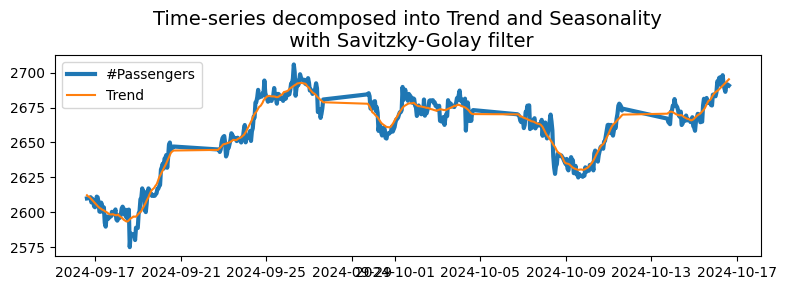

In [13]:
from scipy.signal import savgol_filter

# Create time indices based on the length of prices (0 to len(prices) - 1)
time_indices = np.arange(len(prices))

yvalues = df['Close'].values
yvalues_trend = savgol_filter(yvalues,25,1)
yvalues_seasonal = yvalues-yvalues_trend

fig, ax = plt.subplots(figsize=(8,3))
ax.plot(df.index.values, yvalues, label='#Passengers',linewidth=3)
ax.plot(df.index.values, yvalues_trend, label='Trend')
#ax.plot(df.index.values, yvalues_seasonal, label='Seasonal Component')
ax.legend()
ax.set_title('Time-series decomposed into Trend and Seasonality\n with Savitzky-Golay filter', fontsize=14)
plt.tight_layout()
plt.show()

prices = yvalues_seasonal

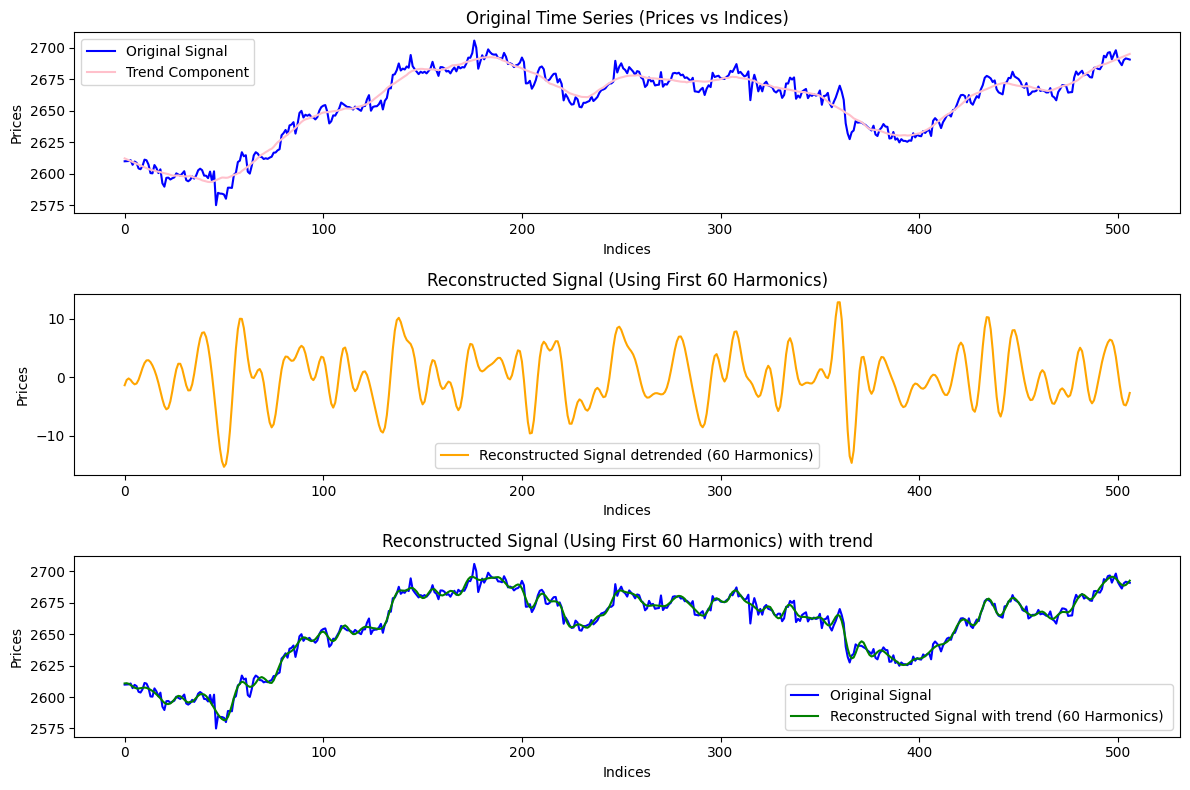

In [16]:

# Perform FFT
N = len(prices)
fft_result = np.fft.fft(prices)
fft_freq = np.fft.fftfreq(N)  # Compute frequency bins

# Only need positive frequencies for real signals
positive_freq_indices = fft_freq >= 0
fft_freq_positive = fft_freq[positive_freq_indices]
fft_result_positive = fft_result[positive_freq_indices]

# Retain only the first few harmonics, including the DC component
num_harmonics = 60  # Adjust this number as needed
frequencies = fft_freq_positive[:num_harmonics]
amplitudes = fft_result_positive[:num_harmonics]

# Reconstruct the signal using the selected harmonics
reconstructed_signal = np.zeros(N)

for i in range(num_harmonics):
    frequency = frequencies[i]
    amplitude = np.abs(amplitudes[i])
    phase = np.angle(amplitudes[i])
    if frequency == 0:
        # DC component (mean value)
        reconstructed_signal += (amplitude / N) * np.ones(N)
    else:
        # Harmonic components
        omega = 2 * np.pi * frequency
        reconstructed_signal += (2 * amplitude / N) * np.cos(omega * time_indices + phase)

# Plot original time series data
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(time_indices, df['Close'].values, label="Original Signal", color='blue')
plt.plot(time_indices, yvalues_trend, label='Trend Component', color='pink')
plt.title("Original Time Series (Prices vs Indices)")
plt.xlabel("Indices")
plt.ylabel("Prices")
plt.legend()

# Plot the reconstructed signal using only a few harmonics
plt.subplot(3, 1, 2)
plt.plot(time_indices, reconstructed_signal, label=f"Reconstructed Signal detrended ({num_harmonics} Harmonics)", color='orange')
plt.title(f"Reconstructed Signal (Using First {num_harmonics} Harmonics)")
plt.xlabel("Indices")
plt.ylabel("Prices")
plt.legend()

reconstructed_signal_with_trend = yvalues_trend + reconstructed_signal
# Plot the reconstructed signal using only a few harmonics
plt.subplot(3, 1, 3)
plt.plot(time_indices, df['Close'].values, label="Original Signal", color='blue')
plt.plot(time_indices, reconstructed_signal_with_trend, label=f"Reconstructed Signal with trend ({num_harmonics} Harmonics) ", color='green')
plt.title(f"Reconstructed Signal (Using First {num_harmonics} Harmonics) with trend")
plt.xlabel("Indices")
plt.ylabel("Prices")
plt.legend()

plt.tight_layout()
plt.show()

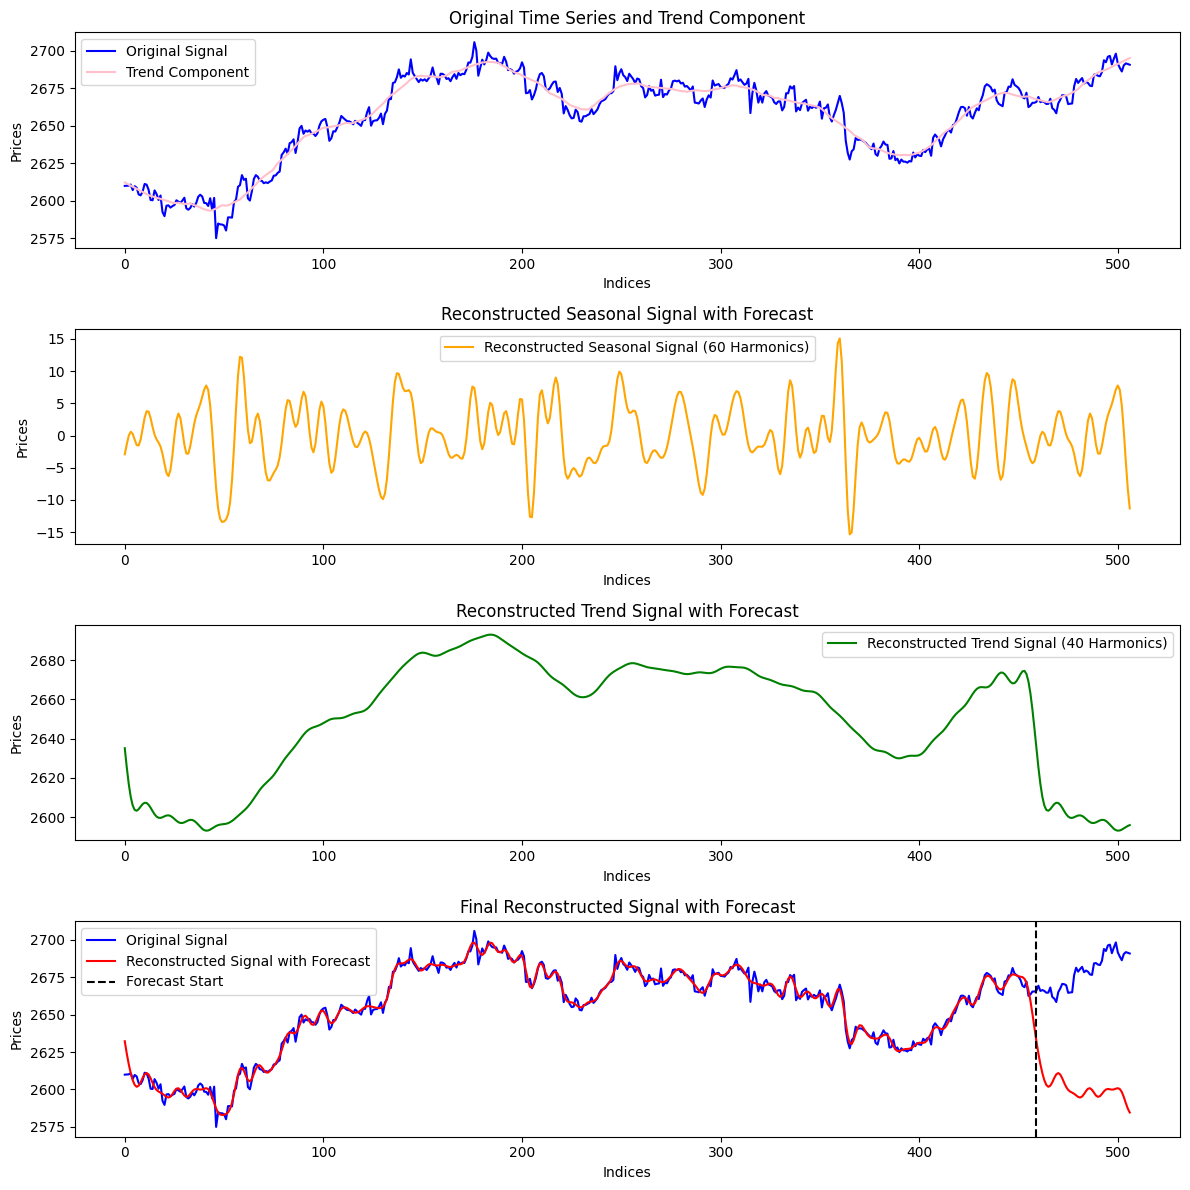

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Assume yvalues, yvalues_seasonal, yvalues_trend, and time_indices are given

# 1. Set the number of elements to forecast
forecast_elements = 48  # You can change this value as needed

# 2. Create variables excluding the last 'forecast_elements' elements
yvalues_seasonal_for_fft = yvalues_seasonal[:-forecast_elements]
yvalues_trend_for_fft = yvalues_trend[:-forecast_elements]

# Time indices for the existing data
N_seasonal = len(yvalues_seasonal_for_fft)
N_trend = len(yvalues_trend_for_fft)

# Ensure that N_seasonal and N_trend are equal
assert N_seasonal == N_trend, "The lengths of the seasonal and trend components must be equal."

# Create extended indices including future points
total_length = N_seasonal + forecast_elements
extended_indices = np.arange(total_length)

# 3. Perform FFT on yvalues_seasonal_for_fft
fft_result_seasonal = np.fft.fft(yvalues_seasonal_for_fft)
fft_freq_seasonal = np.fft.fftfreq(N_seasonal)

# Only need positive frequencies for real signals
positive_freq_indices_seasonal = fft_freq_seasonal >= 0
fft_freq_seasonal_positive = fft_freq_seasonal[positive_freq_indices_seasonal]
fft_result_seasonal_positive = fft_result_seasonal[positive_freq_indices_seasonal]

# Retain only the first few harmonics, including the DC component
num_harmonics_seasonal = 60  # Adjust this number as needed
frequencies_seasonal = fft_freq_seasonal_positive[:num_harmonics_seasonal]
amplitudes_seasonal = fft_result_seasonal_positive[:num_harmonics_seasonal]

# Reconstruct the seasonal signal with forecast
reconstructed_seasonal = np.zeros(total_length)

for i in range(num_harmonics_seasonal):
    frequency = frequencies_seasonal[i]
    amplitude = np.abs(amplitudes_seasonal[i])
    phase = np.angle(amplitudes_seasonal[i])
    if frequency == 0:
        # DC component (mean value)
        reconstructed_seasonal += (amplitude / N_seasonal) * np.ones(total_length)
    else:
        # Harmonic components
        omega = 2 * np.pi * frequency
        reconstructed_seasonal += (2 * amplitude / N_seasonal) * np.cos(omega * extended_indices + phase)

# Perform FFT on yvalues_trend_for_fft
fft_result_trend = np.fft.fft(yvalues_trend_for_fft)
fft_freq_trend = np.fft.fftfreq(N_trend)

positive_freq_indices_trend = fft_freq_trend >= 0
fft_freq_trend_positive = fft_freq_trend[positive_freq_indices_trend]
fft_result_trend_positive = fft_result_trend[positive_freq_indices_trend]

# Retain only the first few harmonics for the trend component
num_harmonics_trend = 40  # Adjust this number as needed
frequencies_trend = fft_freq_trend_positive[:num_harmonics_trend]
amplitudes_trend = fft_result_trend_positive[:num_harmonics_trend]

# Reconstruct the trend signal with forecast
reconstructed_trend = np.zeros(total_length)

for i in range(num_harmonics_trend):
    frequency = frequencies_trend[i]
    amplitude = np.abs(amplitudes_trend[i])
    phase = np.angle(amplitudes_trend[i])
    if frequency == 0:
        # DC component (mean value)
        reconstructed_trend += (amplitude / N_trend) * np.ones(total_length)
    else:
        # Harmonic components
        omega = 2 * np.pi * frequency
        reconstructed_trend += (2 * amplitude / N_trend) * np.cos(omega * extended_indices + phase)

# 4. Sum the reconstructed signals
reconstructed_signal_with_trend = reconstructed_trend + reconstructed_seasonal

# Original price is yvalues
# Prepare extended time indices for plotting
extended_time_indices = np.arange(len(yvalues_trend_for_fft) + forecast_elements)

# 5. Plot suitable graphs for comparison
plt.figure(figsize=(12, 12))

# Plot original time series data and trend
plt.subplot(4, 1, 1)
plt.plot(time_indices, yvalues, label="Original Signal", color='blue')
plt.plot(time_indices, yvalues_trend, label='Trend Component', color='pink')
plt.title("Original Time Series and Trend Component")
plt.xlabel("Indices")
plt.ylabel("Prices")
plt.legend()

# Plot the reconstructed seasonal signal
plt.subplot(4, 1, 2)
plt.plot(extended_time_indices, reconstructed_seasonal, label=f"Reconstructed Seasonal Signal ({num_harmonics_seasonal} Harmonics)", color='orange')
plt.title(f"Reconstructed Seasonal Signal with Forecast")
plt.xlabel("Indices")
plt.ylabel("Prices")
plt.legend()

# Plot the reconstructed trend signal
plt.subplot(4, 1, 3)
plt.plot(extended_time_indices, reconstructed_trend, label=f"Reconstructed Trend Signal ({num_harmonics_trend} Harmonics)", color='green')
plt.title(f"Reconstructed Trend Signal with Forecast")
plt.xlabel("Indices")
plt.ylabel("Prices")
plt.legend()

# Plot the final reconstructed signal (trend + seasonal)
plt.subplot(4, 1, 4)
plt.plot(time_indices, yvalues, label="Original Signal", color='blue')
plt.plot(extended_time_indices, reconstructed_signal_with_trend, label="Reconstructed Signal with Forecast", color='red')
plt.axvline(x=N_seasonal, color='black', linestyle='--', label='Forecast Start')
plt.title("Final Reconstructed Signal with Forecast")
plt.xlabel("Indices")
plt.ylabel("Prices")
plt.legend()

plt.tight_layout()
plt.show()



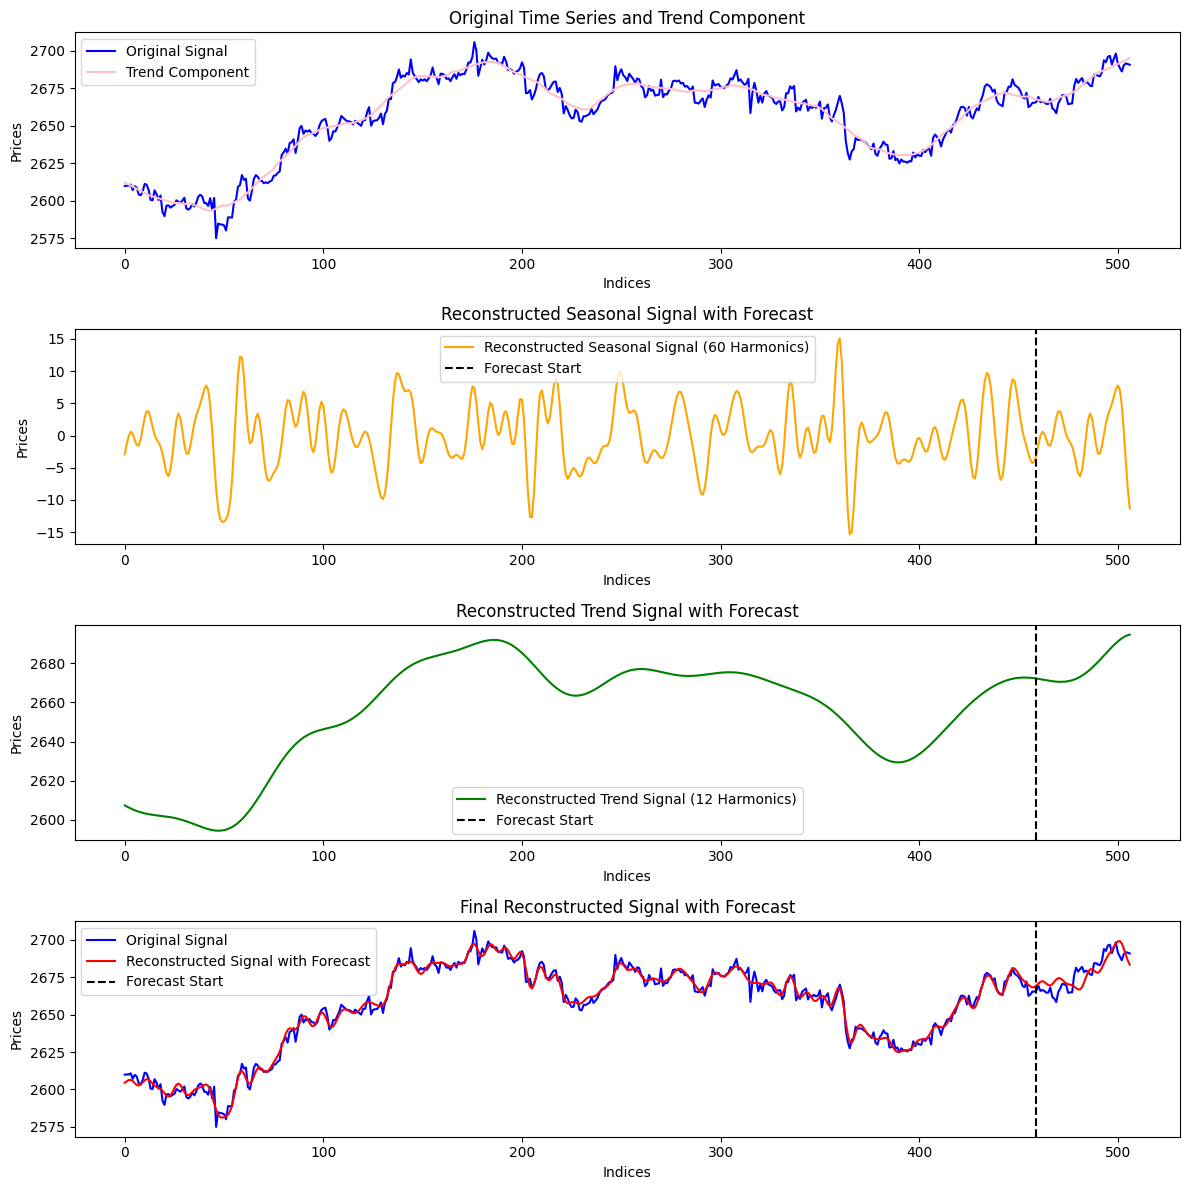

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# ================================
# Adjustable Parameters
# ================================
forecast_elements = 48          # Number of elements to forecast
padding_trend_elements = 72     # Number of elements to pad at the beginning and end for trend component
padding_slope = 0.4             # Slope for padding at the forecast side (increment per element)
num_harmonics_seasonal = 60     # Number of harmonics to use for the seasonal component
num_harmonics_trend = 12        # Number of harmonics to use for the trend component

# ================================
# Assume yvalues, yvalues_seasonal, yvalues_trend, and time_indices are given
# yvalues: Original price data
# yvalues_seasonal: Seasonal component of the data
# yvalues_trend: Trend component of the data
# time_indices: Indices corresponding to yvalues

# 1. Set the number of elements to forecast (already set above)

# 2. Create variables excluding the last 'forecast_elements' elements
yvalues_seasonal_for_fft = yvalues_seasonal[:-forecast_elements]
yvalues_trend_for_fft = yvalues_trend[:-forecast_elements]

# Time indices for the existing data
N_seasonal = len(yvalues_seasonal_for_fft)
N_trend = len(yvalues_trend_for_fft)

# Ensure that N_seasonal and N_trend are equal
assert N_seasonal == N_trend, "The lengths of the seasonal and trend components must be equal."

# 2a. Apply padding to the trend component to mitigate windowing effects
# Padding at the beginning: copy the first element
trend_padding_start = np.full(padding_trend_elements, yvalues_trend_for_fft[0])

# Padding at the end: increment each element by padding_slope
last_value = yvalues_trend_for_fft[-1]
trend_padding_end = last_value + padding_slope * np.arange(1, padding_trend_elements + 1)

# Concatenate the padding and the original trend data
padded_yvalues_trend_for_fft = np.concatenate([trend_padding_start, yvalues_trend_for_fft, trend_padding_end])

# Update N_trend_padded
N_trend_padded = len(padded_yvalues_trend_for_fft)

# Create indices for the padded trend data
trend_padded_indices = np.arange(-padding_trend_elements, N_trend + padding_trend_elements)

# 3. Perform FFT on yvalues_seasonal_for_fft
fft_result_seasonal = np.fft.fft(yvalues_seasonal_for_fft)
fft_freq_seasonal = np.fft.fftfreq(N_seasonal)

# Only need positive frequencies for real signals
positive_freq_indices_seasonal = fft_freq_seasonal >= 0
fft_freq_seasonal_positive = fft_freq_seasonal[positive_freq_indices_seasonal]
fft_result_seasonal_positive = fft_result_seasonal[positive_freq_indices_seasonal]

# Retain only the first few harmonics, including the DC component
frequencies_seasonal = fft_freq_seasonal_positive[:num_harmonics_seasonal]
amplitudes_seasonal = fft_result_seasonal_positive[:num_harmonics_seasonal]

# Reconstruct the seasonal signal with forecast
total_length = N_seasonal + forecast_elements
extended_indices = np.arange(total_length)

reconstructed_seasonal = np.zeros(total_length)

for i in range(num_harmonics_seasonal):
    frequency = frequencies_seasonal[i]
    amplitude = np.abs(amplitudes_seasonal[i])
    phase = np.angle(amplitudes_seasonal[i])
    if frequency == 0:
        # DC component (mean value)
        reconstructed_seasonal += (amplitude / N_seasonal) * np.ones(total_length)
    else:
        # Harmonic components
        omega = 2 * np.pi * frequency
        reconstructed_seasonal += (2 * amplitude / N_seasonal) * np.cos(omega * extended_indices + phase)

# 3a. Perform FFT on padded trend component
fft_result_trend = np.fft.fft(padded_yvalues_trend_for_fft)
fft_freq_trend = np.fft.fftfreq(N_trend_padded)

positive_freq_indices_trend = fft_freq_trend >= 0
fft_freq_trend_positive = fft_freq_trend[positive_freq_indices_trend]
fft_result_trend_positive = fft_result_trend[positive_freq_indices_trend]

# Retain only the first few harmonics for the trend component
frequencies_trend = fft_freq_trend_positive[:num_harmonics_trend]
amplitudes_trend = fft_result_trend_positive[:num_harmonics_trend]

# Reconstruct the trend signal with forecast
total_length_padded = N_trend_padded + forecast_elements
extended_indices_padded = np.arange(total_length_padded)

reconstructed_trend_padded = np.zeros(total_length_padded)

for i in range(num_harmonics_trend):
    frequency = frequencies_trend[i]
    amplitude = np.abs(amplitudes_trend[i])
    phase = np.angle(amplitudes_trend[i])
    if frequency == 0:
        # DC component (mean value)
        reconstructed_trend_padded += (amplitude / N_trend_padded) * np.ones(total_length_padded)
    else:
        # Harmonic components
        omega = 2 * np.pi * frequency
        reconstructed_trend_padded += (2 * amplitude / N_trend_padded) * np.cos(omega * extended_indices_padded + phase)

# Remove the padding from the reconstructed trend signal before forecasting
start_index = padding_trend_elements
end_index = start_index + N_trend + forecast_elements  # Include forecast elements

reconstructed_trend = reconstructed_trend_padded[start_index:end_index]

# 4. Sum the reconstructed signals
reconstructed_signal_with_trend = reconstructed_trend + reconstructed_seasonal

# Original price is yvalues
# Prepare extended time indices for plotting
extended_time_indices = np.arange(len(yvalues_trend_for_fft) + forecast_elements)

# 5. Plot suitable graphs for comparison
plt.figure(figsize=(12, 12))

# Plot original time series data and trend
plt.subplot(4, 1, 1)
plt.plot(time_indices, yvalues, label="Original Signal", color='blue')
plt.plot(time_indices, yvalues_trend, label='Trend Component', color='pink')
plt.title("Original Time Series and Trend Component")
plt.xlabel("Indices")
plt.ylabel("Prices")
plt.legend()

# Plot the reconstructed seasonal signal
plt.subplot(4, 1, 2)
plt.plot(extended_time_indices, reconstructed_seasonal, label=f"Reconstructed Seasonal Signal ({num_harmonics_seasonal} Harmonics)", color='orange')
plt.axvline(x=N_seasonal, color='black', linestyle='--', label='Forecast Start')
plt.title("Reconstructed Seasonal Signal with Forecast")
plt.xlabel("Indices")
plt.ylabel("Prices")
plt.legend()

# Plot the reconstructed trend signal
plt.subplot(4, 1, 3)
plt.plot(extended_time_indices, reconstructed_trend, label=f"Reconstructed Trend Signal ({num_harmonics_trend} Harmonics)", color='green')
plt.axvline(x=N_seasonal, color='black', linestyle='--', label='Forecast Start')
plt.title("Reconstructed Trend Signal with Forecast")
plt.xlabel("Indices")
plt.ylabel("Prices")
plt.legend()

# Plot the final reconstructed signal (trend + seasonal)
plt.subplot(4, 1, 4)
plt.plot(time_indices, yvalues, label="Original Signal", color='blue')
plt.plot(extended_time_indices, reconstructed_signal_with_trend, label="Reconstructed Signal with Forecast", color='red')
plt.axvline(x=N_seasonal, color='black', linestyle='--', label='Forecast Start')
plt.title("Final Reconstructed Signal with Forecast")
plt.xlabel("Indices")
plt.ylabel("Prices")
plt.legend()

plt.tight_layout()
plt.show()

